In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier

#reading in CSV's from a file path
train_df = pd.read_csv('survey.csv')

#Pandas: whats the data row count?
print(train_df.shape)
    
#Pandas: whats the distribution of the data?
print(train_df.describe())
    
#Pandas: What types of data do i have?
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

### cleaning data

In [2]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [3]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, “state” just to make our lives easier.
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df = train_df.drop(['Timestamp'], axis= 1)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [4]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)   

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [5]:
#clean 'Gender'
#Slower case all columm's elements
gender = train_df['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = train_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [6]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [7]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [8]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


### encoding data

In [9]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [10]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

###  Covariance Matrix. Variability comparison between categories of variables

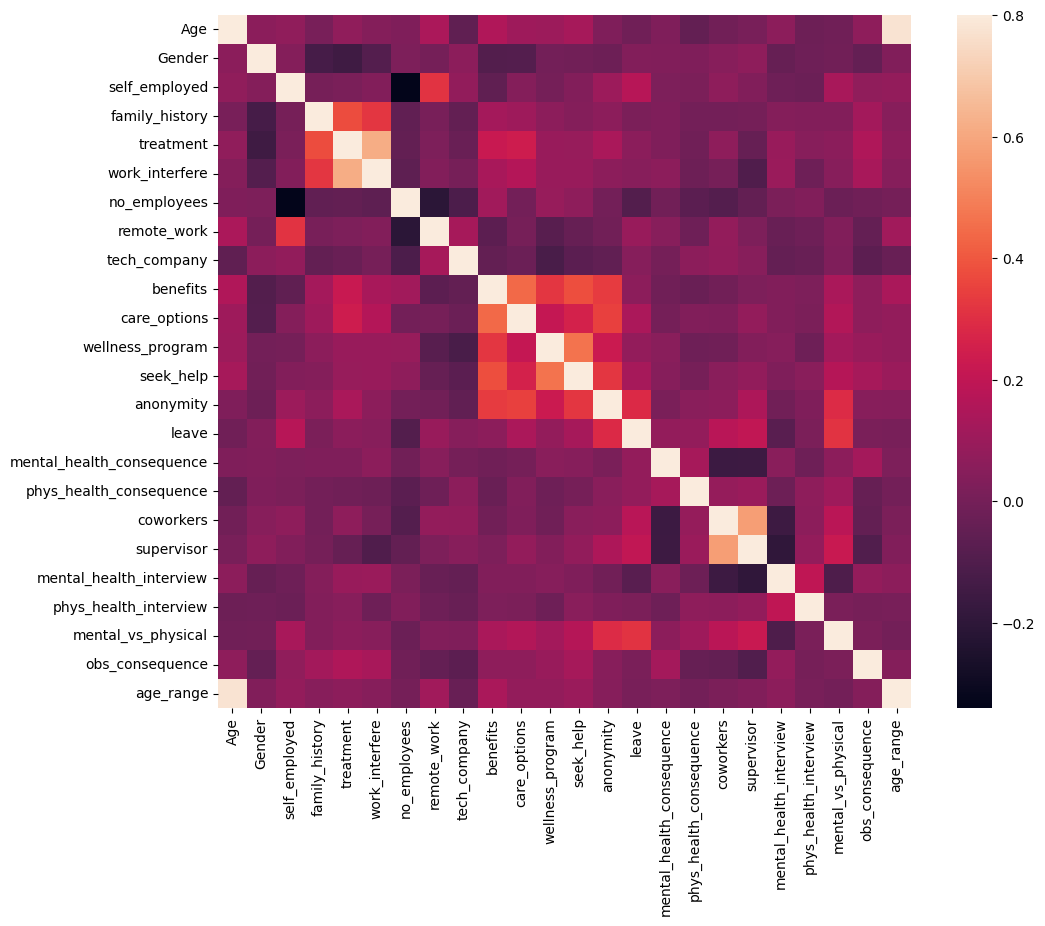

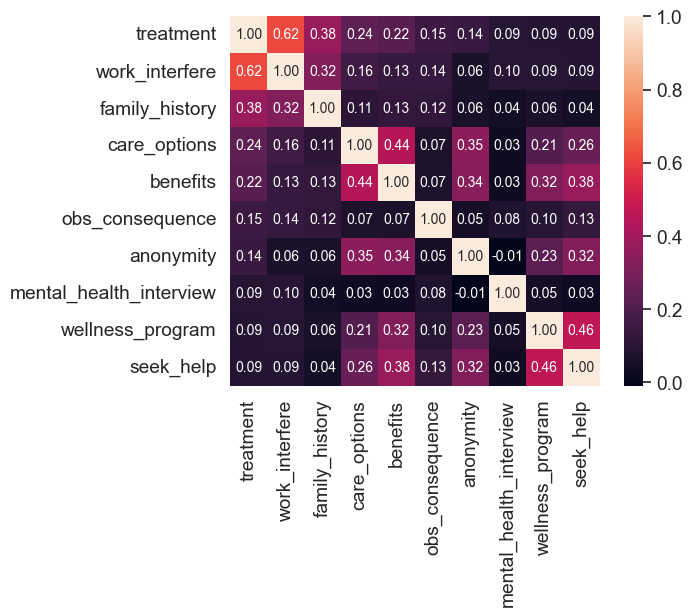

In [11]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Some charts to see data relationship

#### Distribiution and density by Age

C:\Users\paundra ppti 18\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Age')

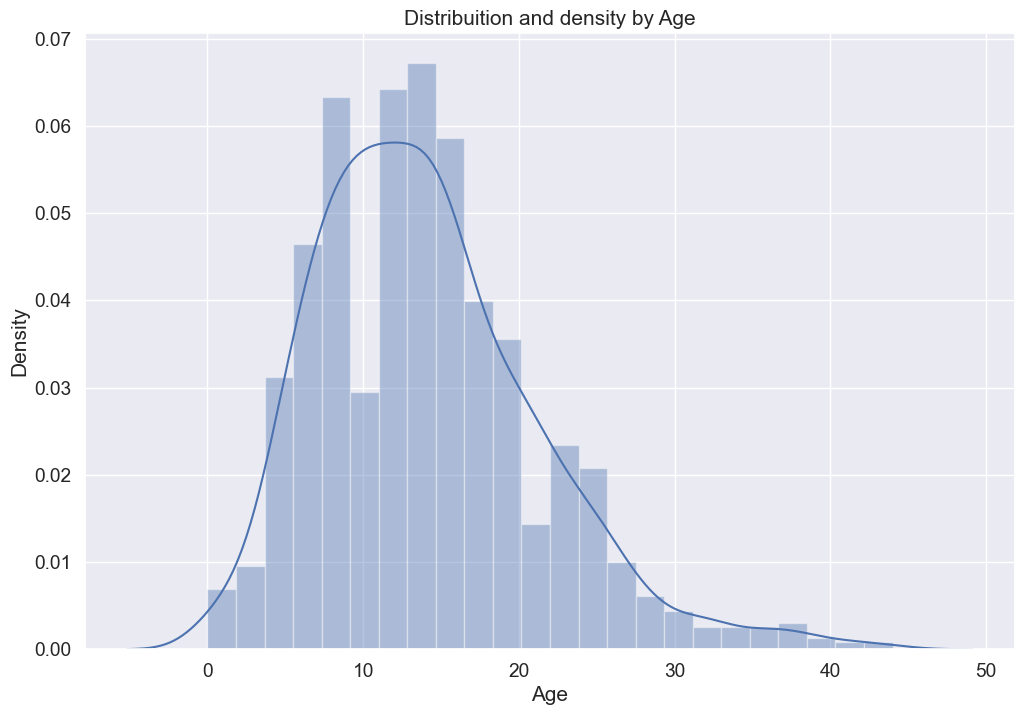

In [12]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

#### Separate by treatment

c:\Users\paundra ppti 18\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\paundra ppti 18\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

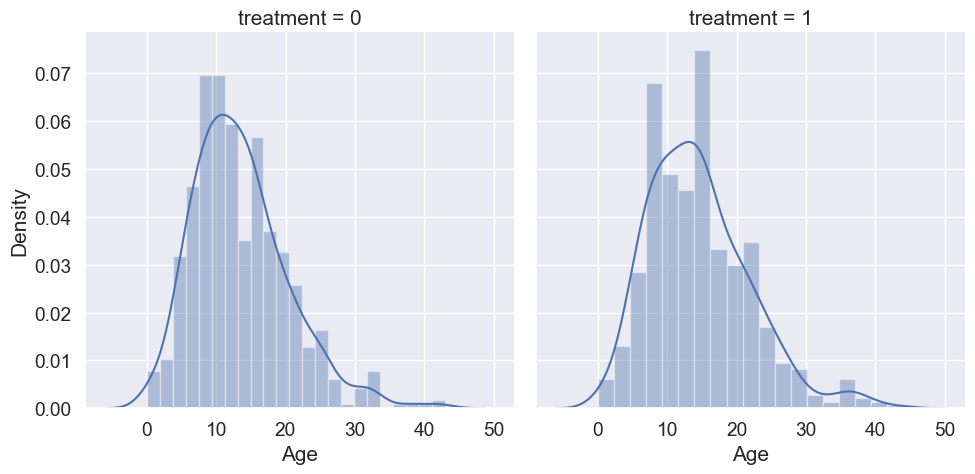

In [13]:
# Separate by treatment or not

g = sns.FacetGrid(train_df, col='treatment', height=5)
g = g.map(sns.distplot, "Age")

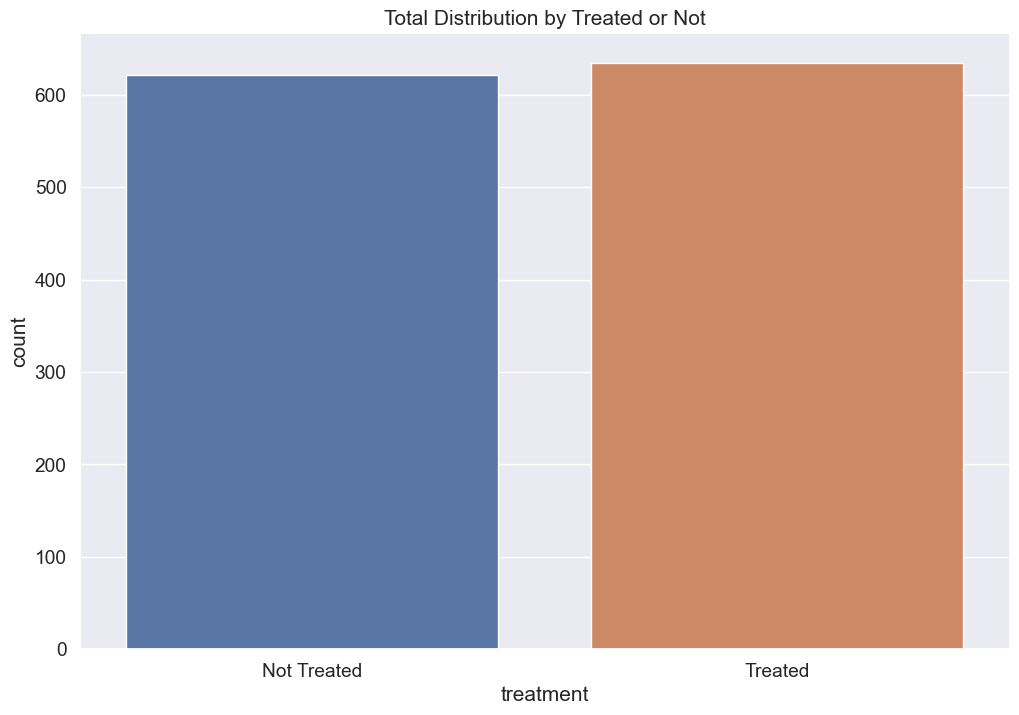

In [14]:
plt.figure(figsize=(12,8))

# Assuming the 'treatment' column is categorical, if not, you can convert it first
g = sns.countplot(x="treatment", data=train_df)

# If you have custom labels, make sure labelDict['label_Gender'] is defined
# If not, you can skip or use default labels
# Example: g.set_xticklabels(["Not Treated", "Treated"]) for custom labels

g.set_xticklabels(["Not Treated", "Treated"])  # If 'treatment' has binary values

plt.title('Total Distribution by Treated or Not')
plt.show()


#### Draw a nested barplot to show probabilities for class and sex

C:\Users\paundra ppti 18\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  """


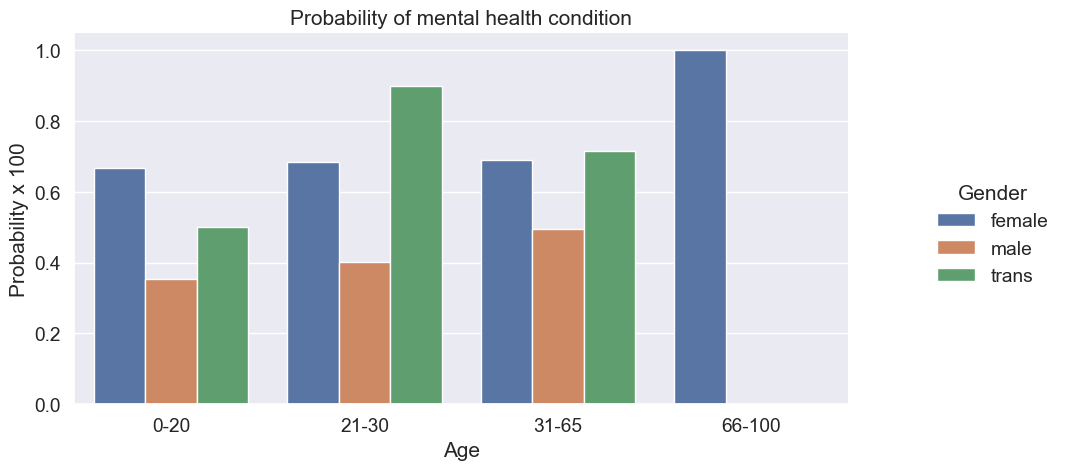

In [15]:
# Assuming labelDict['label_age_range'] and labelDict['label_Gender'] are properly defined
o = labelDict['label_age_range']

# Using catplot instead of factorplot
g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


#### Barplot to show probabilities for family history

C:\Users\paundra ppti 18\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  """


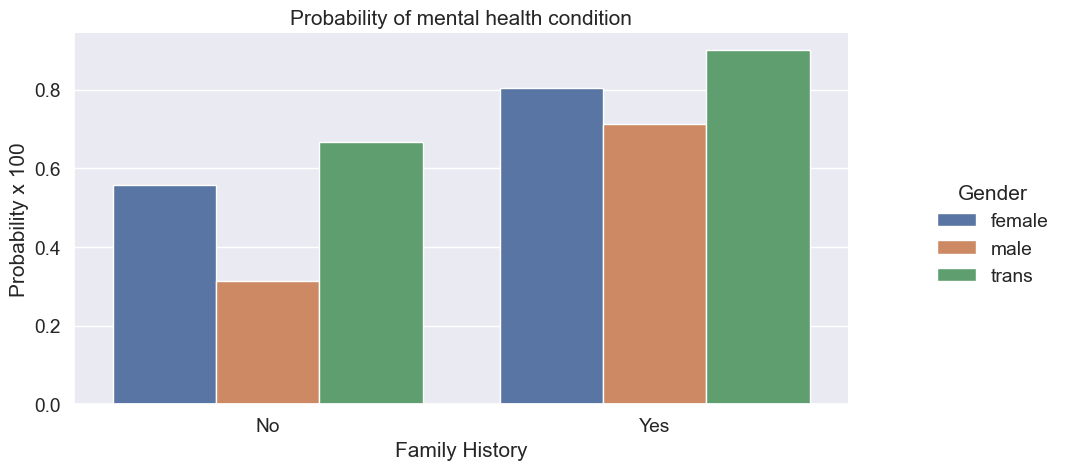

In [16]:
# Assuming labelDict['label_family_history'] and labelDict['label_Gender'] are properly defined
o = labelDict['label_family_history']

# Using catplot instead of factorplot
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


#### Barplot to show probabilities for care options

C:\Users\paundra ppti 18\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  """


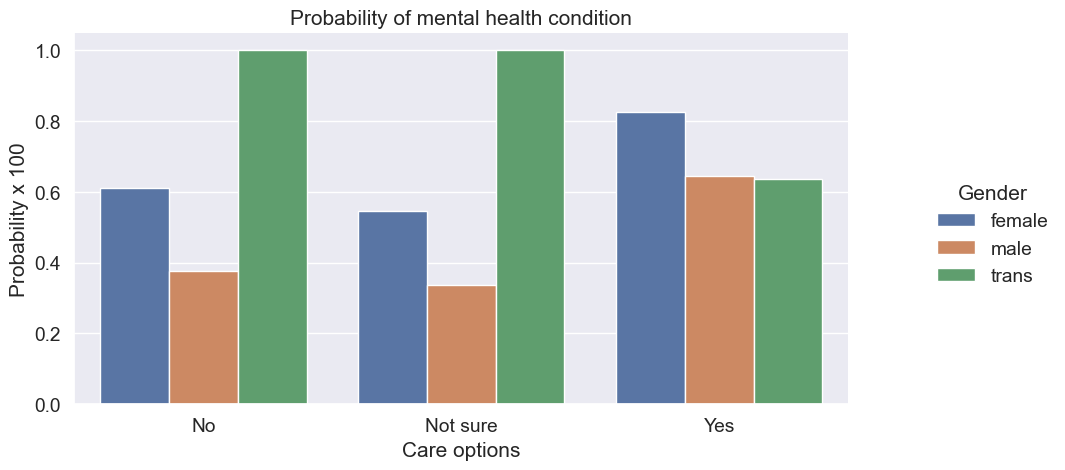

In [17]:
# Assuming labelDict['label_care_options'] and labelDict['label_Gender'] are properly defined
o = labelDict['label_care_options']

# Using catplot instead of factorplot
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


#### Barplot to show probabilities for benefits

C:\Users\paundra ppti 18\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  """


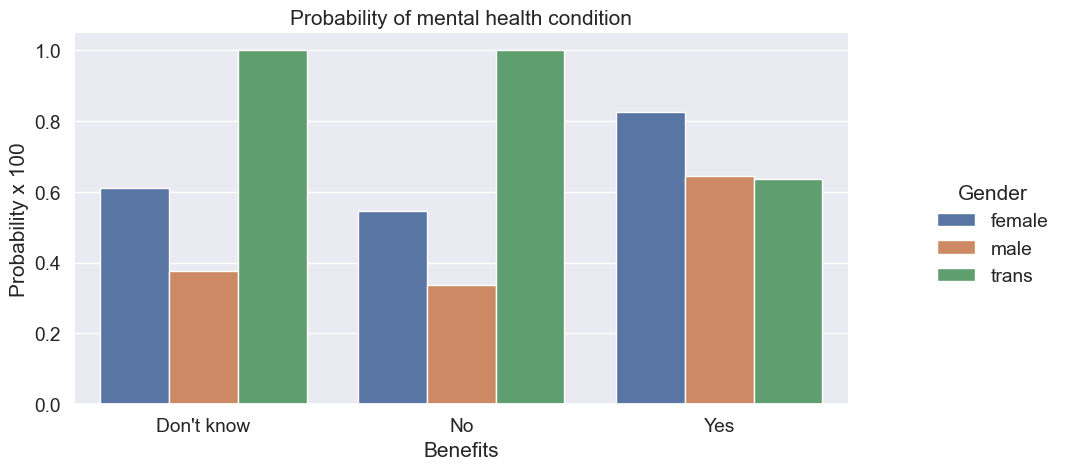

In [18]:
# Assuming labelDict['label_benefits'] and labelDict['label_Gender'] are properly defined
o = labelDict['label_benefits']

# Using catplot instead of factorplot
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


#### Barplot to show probabilities for work interfere

C:\Users\paundra ppti 18\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  """


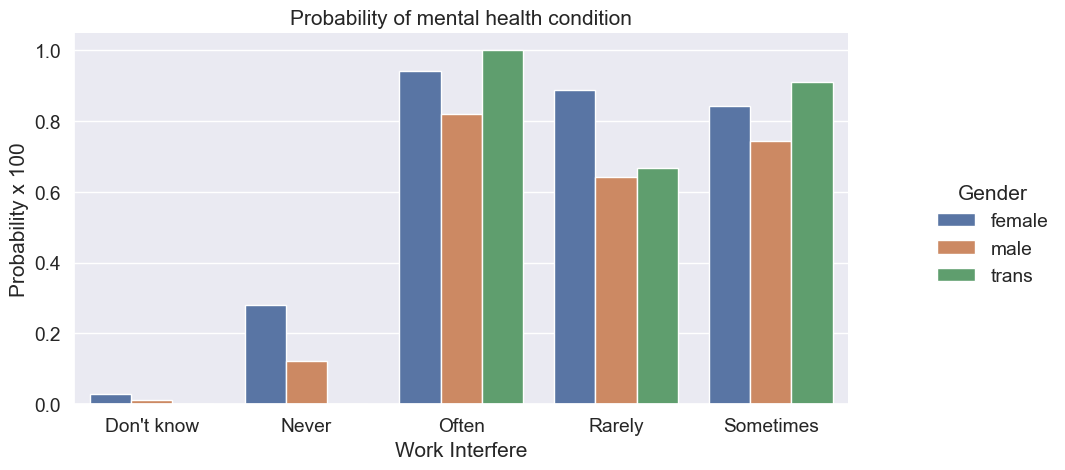

In [19]:
# Assuming labelDict['label_work_interfere'] and labelDict['label_Gender'] are properly defined
o = labelDict['label_work_interfere']

# Using catplot instead of factorplot
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work Interfere')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


###  Scaling and fitting

In [20]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [21]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

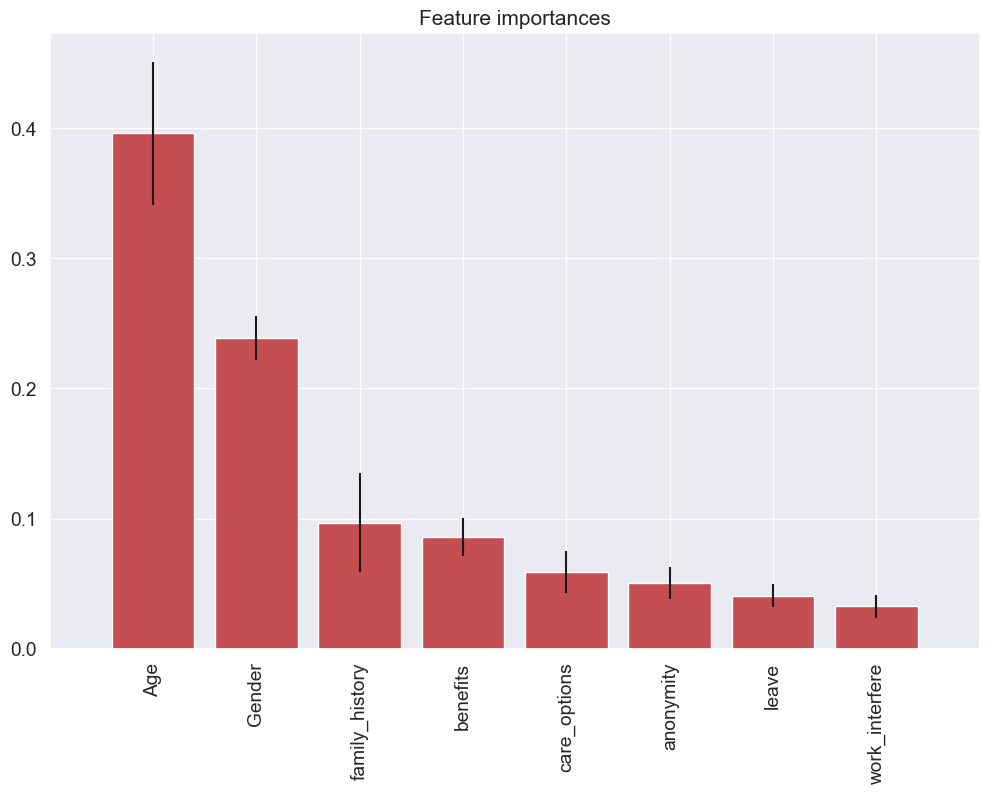

In [22]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()


berdasarkan chart berikut ini maka kita mengurangi dari yang awalnya 27 fitur menjadi hanya 7 fitur saja yang digunakan. karena 7 fitur ini yang paling berpengaruh terhadap hasilnya

### Tuning

In [23]:
from sklearn.preprocessing import binarize

def evalClassModel(model, X_test, y_test, y_pred_class, plot=False):
    # Classification accuracy: percentage of correct predictions
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    # Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    print('Null accuracy:\n', y_test.value_counts())
    
    # Calculate the percentage of ones and zeros
    print('Percentage of ones:', y_test.mean())
    print('Percentage of zeros:', 1 - y_test.mean())
    
    # Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # Visualize Confusion Matrix
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Metrics computed from a confusion matrix
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - accuracy)
    
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    # AUC Score
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # Cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X_test, y_test, cv=10, scoring='roc_auc').mean())
    
    # Adjusting the classification threshold
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])
    print('First 10 predicted probabilities for class 1:\n', model.predict_proba(X_test)[:, 1][0:10])
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot:
        plt.hist(y_pred_prob, bins=8)
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        plt.show()
    
    # Predict treatment if the predicted probability is greater than 0.3
    y_pred_prob = y_pred_prob.reshape(-1, 1)
    y_pred_class = binarize(y_pred_prob, threshold=0.3)  # Fix here: threshold as keyword argument
    
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    # ROC Curves and Area Under the Curve (AUC)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    
    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    # Threshold evaluation
    def evaluate_threshold(threshold):
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    return accuracy


#### Tuning with cross validation score

In [24]:
##########################################
# Tuning with cross validation score
##########################################
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

#### Tuning with GridSearchCV

In [25]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.grid_scores_
    
    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

#### Tuning with RandomizedSearchCV

In [26]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.grid_scores_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

#### Tuning with searching multiple parameters simultaneously

In [27]:
from sklearn.model_selection import GridSearchCV

def tuningMultParam(knn, X, y):
    # Searching multiple parameters simultaneously
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    # Create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 

    # Instantiate and fit the grid search
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # View the complete results (using cv_results_)
    print(grid.cv_results_)
    
    # Examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

# Usage (make sure X and y are defined beforehand):
# tuningMultParam(KNeighborsClassifier(), X, y)


#### Evaluating models

In [28]:
from sklearn.linear_model import LogisticRegression

def logisticRegression(X_train, y_train, X_test, y_test, methodDict):
    # Train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    # Call evalClassModel with correct arguments
    accuracy_score = evalClassModel(logreg, X_test, y_test, y_pred_class, True)
    
    # Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100
    return methodDict

# Usage (make sure X_train, X_test, y_train, y_test, and methodDict are defined):
# methodDict = logisticRegression(X_train, y_train, X_test, y_test, methodDict)


########### Logistic Regression ###############
Accuracy: 0.7962962962962963
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


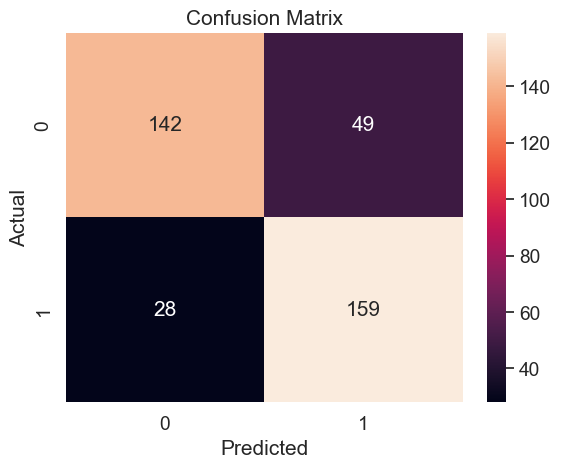

Classification Accuracy: 0.7962962962962963
Classification Error: 0.20370370370370372
False Positive Rate: 0.25654450261780104
Precision: 0.7644230769230769
AUC Score: 0.7968614385306716
Cross-validated AUC: 0.868014004309018
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 1]
First 10 predicted probabilities of class members:
 [[0.09193053 0.90806947]
 [0.95991564 0.04008436]
 [0.96547467 0.03452533]
 [0.78757121 0.21242879]
 [0.38959922 0.61040078]
 [0.05264207 0.94735793]
 [0.75035574 0.24964426]
 [0.19065116 0.80934884]
 [0.61612081 0.38387919]
 [0.47699963 0.52300037]]
First 10 predicted probabilities for class 1:
 [0.90806947 0.04008436 0.03452533 0.21242879 0.61040078 0.94735793
 0.24964426 0.80934884 0.38387919 0.52300037]


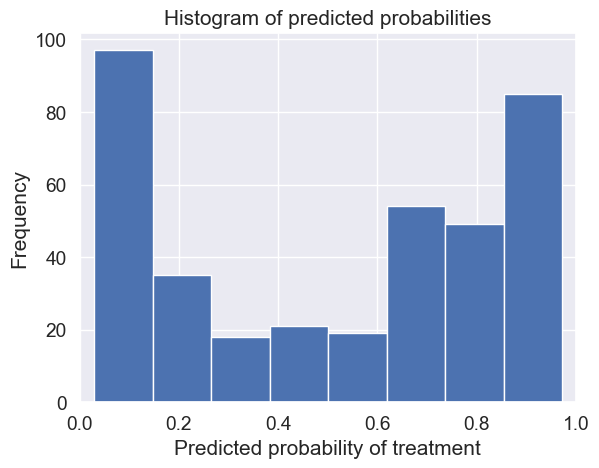

First 10 predicted probabilities:
 [[0.90806947]
 [0.04008436]
 [0.03452533]
 [0.21242879]
 [0.61040078]
 [0.94735793]
 [0.24964426]
 [0.80934884]
 [0.38387919]
 [0.52300037]]


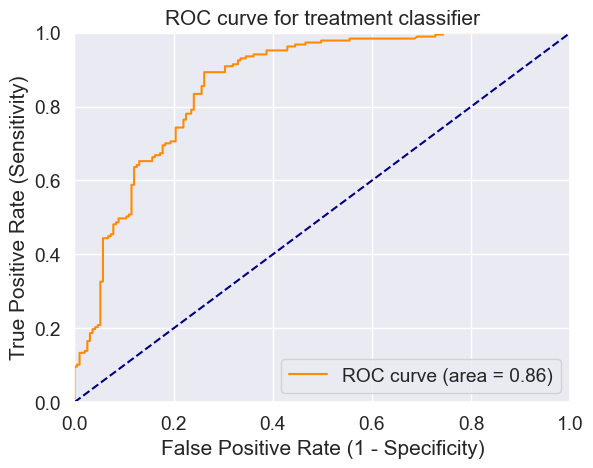

[[142  49]
 [ 28 159]]


{'Log. Regres.': 79.62962962962963}

In [29]:
logisticRegression(X_train, y_train, X_test, y_test, methodDict)


#### KNeighbors Classifier

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

def Knn(X_train, y_train, X_test, y_test, methodDict):
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # Define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # Specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    
    # Perform RandomizedSearchCV
    tuningRandomizedSearchCV(knn, param_dist, X_train, y_train)
    
    # Train a KNeighborsClassifier model on the training set with the best parameters
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')  # Adjust these based on RandomizedSearchCV result
    knn.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, X_test, y_test, y_pred_class, True)

    # Data for final graph
    methodDict['KNN'] = accuracy_score * 100
    return methodDict

def tuningRandomizedSearchCV(knn, param_dist, X_train, y_train):
    # Instantiate and fit RandomizedSearchCV
    random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=10, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)

    # View the complete results using cv_results_
    print(random_search.cv_results_)

    # Examine the best model
    print('RandomizedSearchCV Best Score: ', random_search.best_score_)
    print('RandomizedSearchCV Best Params: ', random_search.best_params_)

# Usage (ensure you define X_train, X_test, y_train, y_test, and methodDict before calling)
# methodDict = Knn(X_train, y_train, X_test, y_test, methodDict)


{'mean_fit_time': array([0.00190909, 0.00160072, 0.00161719, 0.0013999 , 0.00137937,
       0.00142219, 0.00175011, 0.00180535, 0.00160267, 0.00132341]), 'std_fit_time': array([0.00054082, 0.00053937, 0.00049443, 0.00048905, 0.0005834 ,
       0.00047257, 0.00051457, 0.00046063, 0.00065974, 0.00051154]), 'mean_score_time': array([0.00206409, 0.00115178, 0.00204699, 0.00172389, 0.00138741,
       0.00259778, 0.00126808, 0.00220227, 0.00231469, 0.00168812]), 'std_score_time': array([0.00055536, 0.00032251, 0.00033697, 0.00068606, 0.00048168,
       0.00067313, 0.00039882, 0.00046333, 0.00069992, 0.00063655]), 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                   'distance', 'uniform', 'distance', 'uniform',
                   'uniform', 'distance'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_n_neighbors': masked_array(da

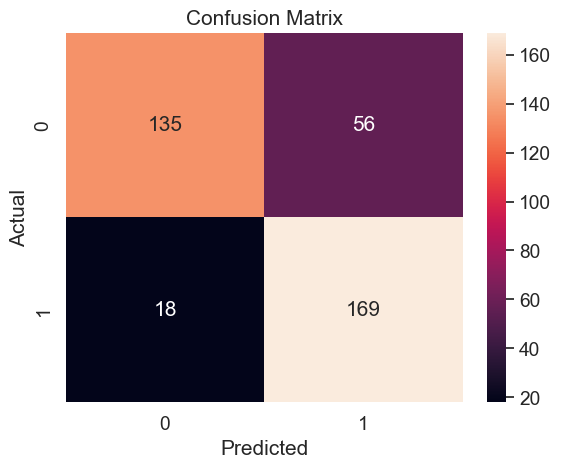

Classification Accuracy: 0.8042328042328042
Classification Error: 0.1957671957671958
False Positive Rate: 0.2931937172774869
Precision: 0.7511111111111111
AUC Score: 0.8052747991152673
Cross-validated AUC: 0.8664639119729147
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.37037037 0.62962963]
 [0.03703704 0.96296296]
 [0.59259259 0.40740741]
 [0.37037037 0.62962963]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]
First 10 predicted probabilities for class 1:
 [0.66666667 0.         0.         0.33333333 0.62962963 0.96296296
 0.40740741 0.62962963 0.66666667 0.66666667]


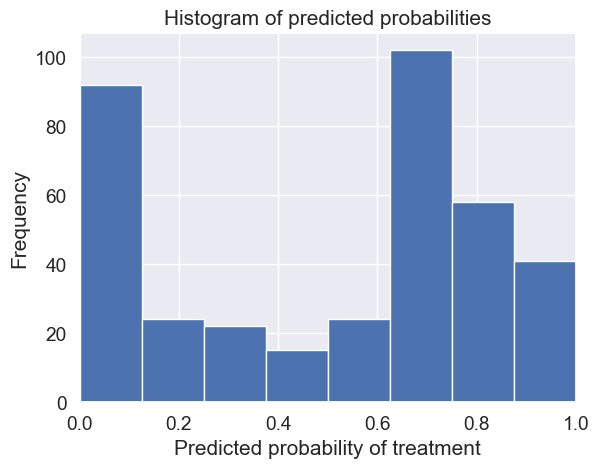

First 10 predicted probabilities:
 [[0.66666667]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.62962963]
 [0.96296296]
 [0.40740741]
 [0.62962963]
 [0.66666667]
 [0.66666667]]


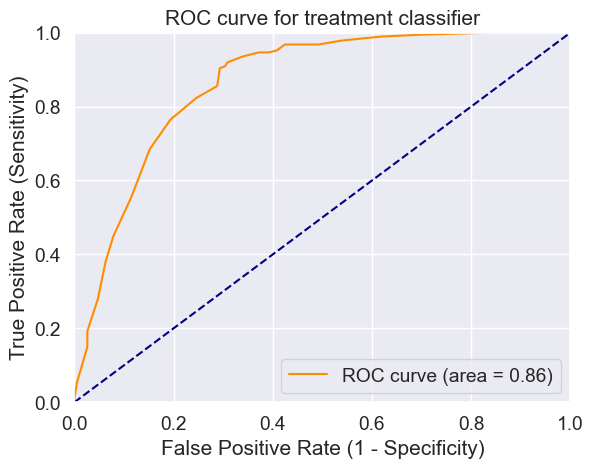

[[135  56]
 [ 18 169]]


{'Log. Regres.': 79.62962962962963, 'KNN': 80.42328042328042}

In [31]:
Knn(X_train, y_train, X_test, y_test, methodDict)

#### Decision Tree classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import binarize

def treeClassifier(X_train, y_train, X_test, y_test, feature_cols, methodDict):
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = len(feature_cols)
    
    param_dist = {"max_depth": [3, None],
                  "max_features": randint(1, featuresSize),
                  "min_samples_split": randint(2, 9),
                  "min_samples_leaf": randint(1, 9),
                  "criterion": ["gini", "entropy"]}
    
    # Perform RandomizedSearchCV
    tuningRandomizedSearchCV(tree, param_dist, X_train, y_train)
    
    # Train a decision tree model on the training set with the best parameters
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, X_test, y_test, y_pred_class, True)

    # Data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100
    return methodDict

def tuningRandomizedSearchCV(model, param_dist, X_train, y_train):
    # Instantiate and fit RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=10, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)

    # View the complete results using cv_results_
    print(random_search.cv_results_)

    # Examine the best model
    print('RandomizedSearchCV Best Score: ', random_search.best_score_)
    print('RandomizedSearchCV Best Params: ', random_search.best_params_)

# Example usage (ensure you define X_train, X_test, y_train, y_test, feature_cols, and methodDict before calling)
# methodDict = treeClassifier(X_train, y_train, X_test, y_test, feature_cols, methodDict)


{'mean_fit_time': array([0.00223825, 0.00125458, 0.0066658 , 0.00128646, 0.00105288,
       0.00114779, 0.00166218, 0.00109742, 0.00160642, 0.00136328]), 'std_fit_time': array([0.00089636, 0.00040403, 0.01668107, 0.00044088, 0.00045681,
       0.00057045, 0.00078089, 0.00054407, 0.00077322, 0.00046103]), 'mean_score_time': array([0.00110681, 0.00085559, 0.00029886, 0.0007081 , 0.00066478,
       0.00095572, 0.00045221, 0.00066452, 0.0001503 , 0.00060184]), 'std_score_time': array([0.00049181, 0.00045537, 0.00045652, 0.00046385, 0.00056427,
       0.00035418, 0.00057133, 0.00045095, 0.00032036, 0.00049143]), 'param_criterion': masked_array(data=['gini', 'entropy', 'gini', 'entropy', 'entropy',
                   'entropy', 'entropy', 'gini', 'entropy', 'entropy'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[None, 3, 3, None, None, None,

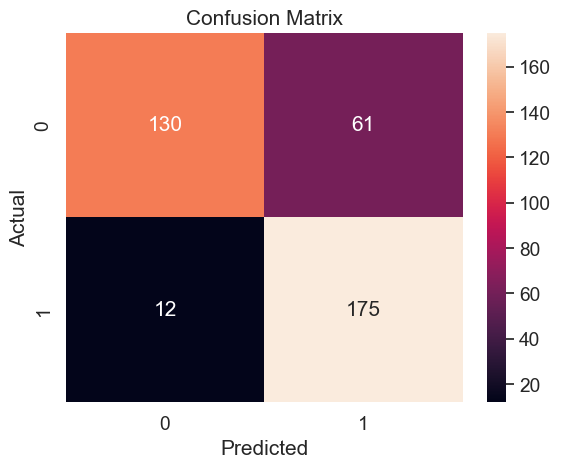

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.3193717277486911
Precision: 0.7415254237288136
AUC Score: 0.8082285746283282
Cross-validated AUC: 0.8641516620498615
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.18823529 0.81176471]
 [1.         0.        ]
 [1.         0.        ]
 [0.87692308 0.12307692]
 [0.36097561 0.63902439]
 [0.05172414 0.94827586]
 [0.87692308 0.12307692]
 [0.11320755 0.88679245]
 [0.36097561 0.63902439]
 [0.36097561 0.63902439]]
First 10 predicted probabilities for class 1:
 [0.81176471 0.         0.         0.12307692 0.63902439 0.94827586
 0.12307692 0.88679245 0.63902439 0.63902439]


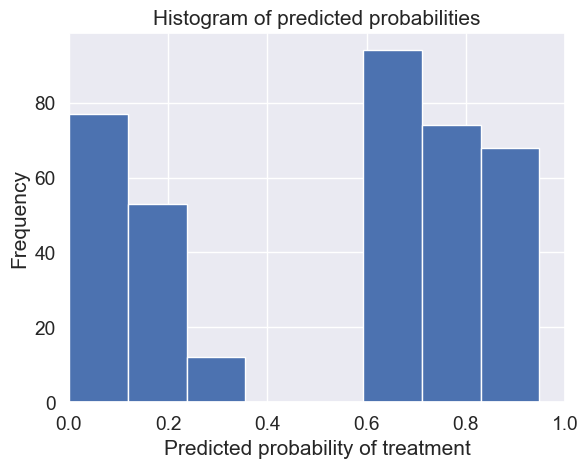

First 10 predicted probabilities:
 [[0.81176471]
 [0.        ]
 [0.        ]
 [0.12307692]
 [0.63902439]
 [0.94827586]
 [0.12307692]
 [0.88679245]
 [0.63902439]
 [0.63902439]]


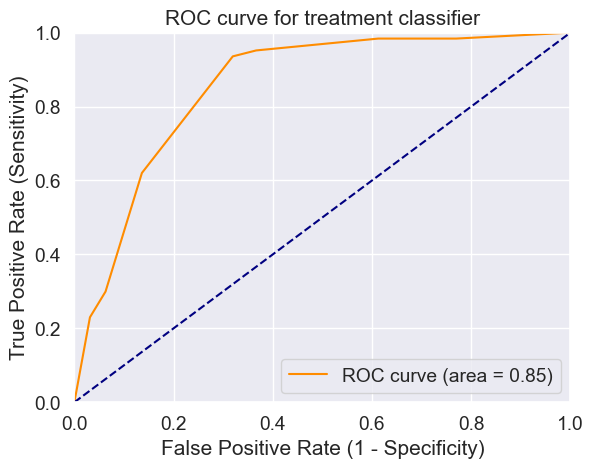

[[130  61]
 [ 12 175]]


{'Log. Regres.': 79.62962962962963,
 'KNN': 80.42328042328042,
 'Tree clas.': 80.68783068783068}

In [33]:
treeClassifier(X_train, y_train, X_test, y_test, feature_cols, methodDict)

#### Random Forests

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import binarize

def randomForest(X_train, y_train, X_test, y_test, feature_cols, methodDict):
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators=20)
    featuresSize = len(feature_cols)  # Using len() instead of __len__()

    param_dist = {
        "max_depth": [3, None],
        "max_features": randint(1, featuresSize),
        "min_samples_split": randint(2, 9),
        "min_samples_leaf": randint(1, 9),
        "criterion": ["gini", "entropy"]
    }

    # Perform RandomizedSearchCV
    tuningRandomizedSearchCV(forest, param_dist, X_train, y_train)
    
    # Train the best RandomForestClassifier model
    forest = RandomForestClassifier(max_depth=None, min_samples_leaf=8, min_samples_split=2, 
                                    n_estimators=20, random_state=1)
    my_forest = forest.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    print('########### Random Forests ###############')
    
    # Call evalClassModel correctly
    accuracy_score = evalClassModel(my_forest, X_test, y_test, y_pred_class, True)

    # Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100
    return methodDict

def tuningRandomizedSearchCV(model, param_dist, X_train, y_train):
    # Instantiate and fit RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=10, 
                                       scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)

    # View the complete results using cv_results_
    print(random_search.cv_results_)

    # Examine the best model
    print('RandomizedSearchCV Best Score: ', random_search.best_score_)
    print('RandomizedSearchCV Best Params: ', random_search.best_params_)

# Example usage (ensure X_train, X_test, y_train, y_test, feature_cols, and methodDict are defined)
# methodDict = randomForest(X_train, y_train, X_test, y_test, feature_cols, methodDict)


{'mean_fit_time': array([0.01739366, 0.01478343, 0.01384251, 0.0155632 , 0.01678715,
       0.01642158, 0.02010343, 0.01388438, 0.01660838, 0.01795907]), 'std_fit_time': array([0.00102054, 0.00097134, 0.00053494, 0.00069972, 0.00093246,
       0.00072149, 0.0044092 , 0.00106512, 0.00065492, 0.00081784]), 'mean_score_time': array([0.00149748, 0.00191104, 0.00139935, 0.00179026, 0.0015871 ,
       0.00168734, 0.00190213, 0.00161052, 0.00136139, 0.00176177]), 'std_score_time': array([0.00065576, 0.00056295, 0.00042304, 0.00050083, 0.00050124,
       0.00044865, 0.00079946, 0.00049914, 0.00044382, 0.00054333]), 'param_criterion': masked_array(data=['gini', 'entropy', 'gini', 'entropy', 'entropy',
                   'entropy', 'entropy', 'gini', 'entropy', 'entropy'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[None, 3, 3, None, None, None,

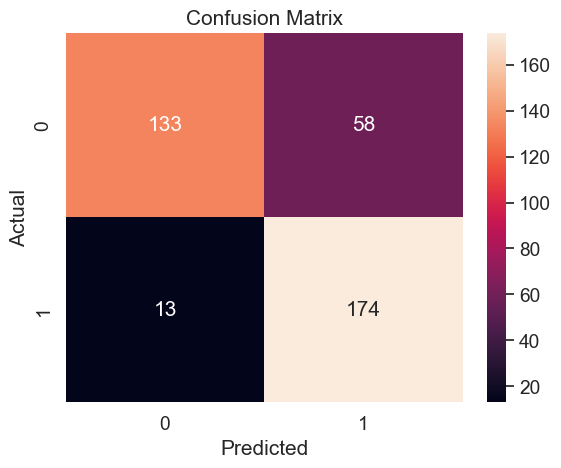

Classification Accuracy: 0.8121693121693122
Classification Error: 0.1878306878306878
False Positive Rate: 0.3036649214659686
Precision: 0.75
AUC Score: 0.8134081809782457
Cross-validated AUC: 0.8911849799938443
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.2555794  0.7444206 ]
 [0.95069083 0.04930917]
 [0.93851009 0.06148991]
 [0.87096597 0.12903403]
 [0.40653554 0.59346446]
 [0.17282958 0.82717042]
 [0.89450448 0.10549552]
 [0.4065912  0.5934088 ]
 [0.20540631 0.79459369]
 [0.19337644 0.80662356]]
First 10 predicted probabilities for class 1:
 [0.7444206  0.04930917 0.06148991 0.12903403 0.59346446 0.82717042
 0.10549552 0.5934088  0.79459369 0.80662356]


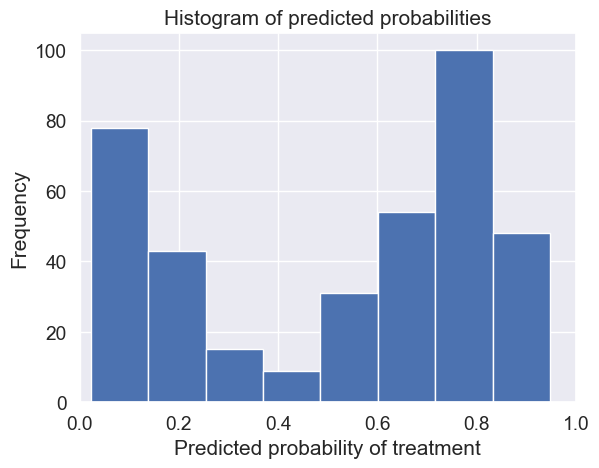

First 10 predicted probabilities:
 [[0.7444206 ]
 [0.04930917]
 [0.06148991]
 [0.12903403]
 [0.59346446]
 [0.82717042]
 [0.10549552]
 [0.5934088 ]
 [0.79459369]
 [0.80662356]]


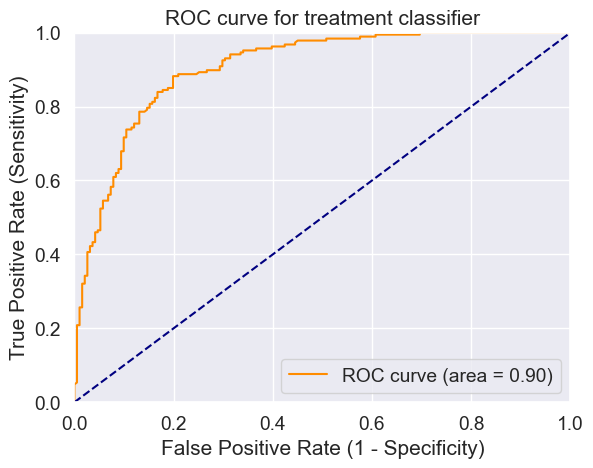

[[133  58]
 [ 13 174]]


{'Log. Regres.': 79.62962962962963,
 'KNN': 80.42328042328042,
 'Tree clas.': 80.68783068783068,
 'R. Forest': 81.21693121693121}

In [35]:
randomForest(X_train, y_train, X_test, y_test, feature_cols, methodDict)

#### Bagging

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import binarize

def bagging(X_train, y_train, X_test, y_test, methodDict):
    # Building and fitting the bagging classifier
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    
    print('########### Bagging ###############')
    
    # Evaluate the model
    accuracy_score = evalClassModel(bag, X_test, y_test, y_pred_class, True)

    # Store results for final graph
    methodDict['Bagging'] = accuracy_score * 100
    return methodDict

# Example usage:
# methodDict = bagging(X_train, y_train, X_test, y_test, methodDict)


########### Bagging ###############
Accuracy: 0.7645502645502645
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0]


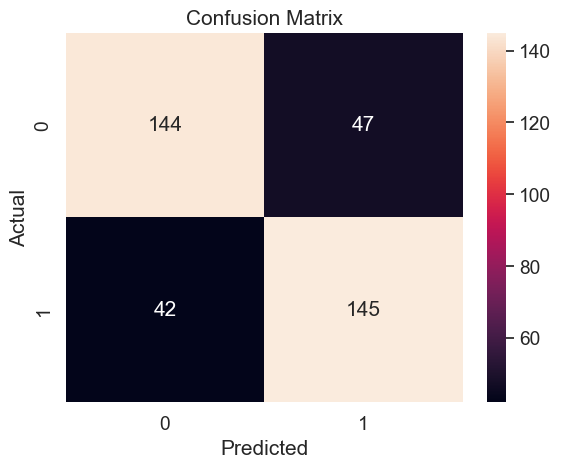

Classification Accuracy: 0.7645502645502645
Classification Error: 0.23544973544973546
False Positive Rate: 0.24607329842931938
Precision: 0.7552083333333334
AUC Score: 0.7646638855446987
Cross-validated AUC: 0.8563015543244076
First 10 predicted responses:
 [1 0 0 0 0 1 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.3 0.7]
 [1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [0.9 0.1]
 [0.2 0.8]
 [1.  0. ]
 [0.7 0.3]
 [0.3 0.7]
 [0.3 0.7]]
First 10 predicted probabilities for class 1:
 [0.7 0.  0.  0.2 0.1 0.8 0.  0.3 0.7 0.7]


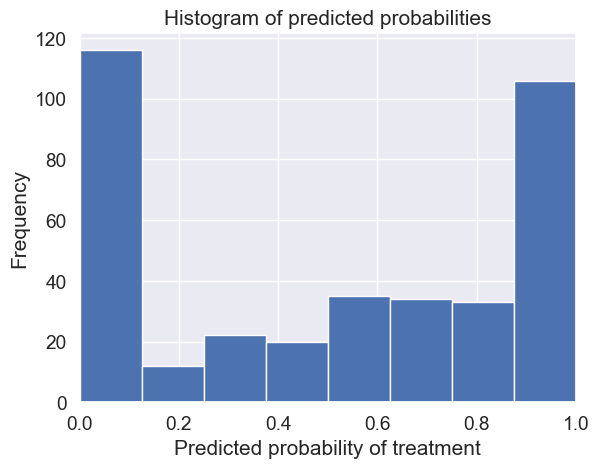

First 10 predicted probabilities:
 [[0.7]
 [0. ]
 [0. ]
 [0.2]
 [0.1]
 [0.8]
 [0. ]
 [0.3]
 [0.7]
 [0.7]]


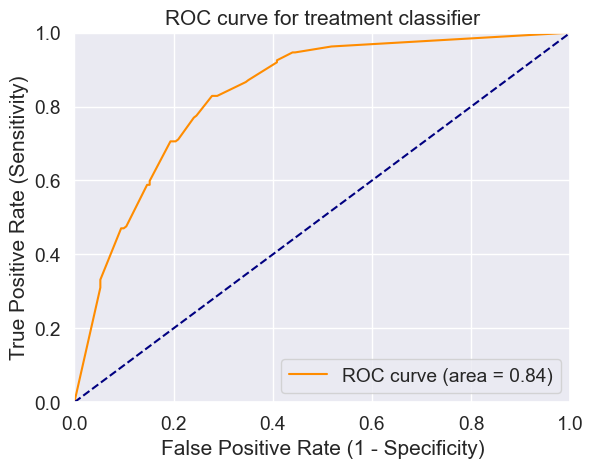

[[144  47]
 [ 42 145]]


{'Log. Regres.': 79.62962962962963,
 'KNN': 80.42328042328042,
 'Tree clas.': 80.68783068783068,
 'R. Forest': 81.21693121693121,
 'Bagging': 76.45502645502646}

In [37]:
bagging(X_train, y_train, X_test, y_test, methodDict)

#### Boosting

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import binarize

def boosting(X_train, y_train, X_test, y_test, methodDict):
    # Building and fitting the boosting model
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    
    print('########### Boosting ###############')
    
    # Evaluate the model
    accuracy_score = evalClassModel(boost, X_test, y_test, y_pred_class, True)

    # Store results for final graph
    methodDict['Boosting'] = accuracy_score * 100
    return methodDict

# Example usage:
# methodDict = boosting(X_train, y_train, X_test, y_test, methodDict)


########### Boosting ###############
Accuracy: 0.8174603174603174
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


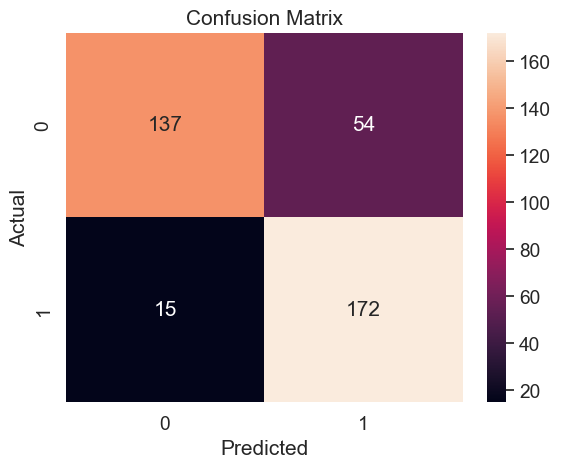

Classification Accuracy: 0.8174603174603174
Classification Error: 0.18253968253968256
False Positive Rate: 0.28272251308900526
Precision: 0.7610619469026548
AUC Score: 0.8185317915838397
Cross-validated AUC: 0.8191035703293321
First 10 predicted responses:
 [1 0 0 0 0 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.49924555 0.50075445]
 [0.50285507 0.49714493]
 [0.50291786 0.49708214]
 [0.50127788 0.49872212]
 [0.50013552 0.49986448]
 [0.49796157 0.50203843]
 [0.50046371 0.49953629]
 [0.49939483 0.50060517]
 [0.49921757 0.50078243]
 [0.49897133 0.50102867]]
First 10 predicted probabilities for class 1:
 [0.50075445 0.49714493 0.49708214 0.49872212 0.49986448 0.50203843
 0.49953629 0.50060517 0.50078243 0.50102867]


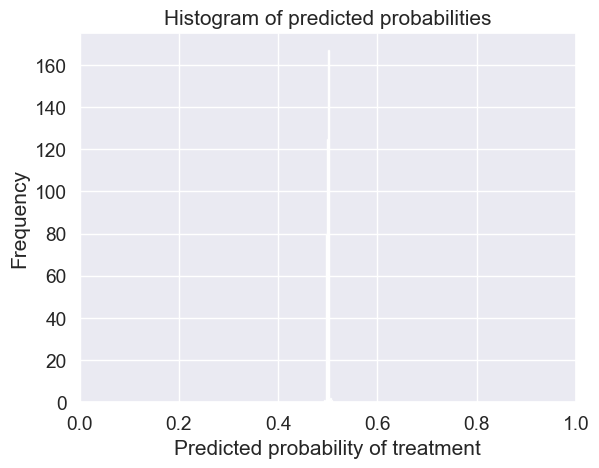

First 10 predicted probabilities:
 [[0.50075445]
 [0.49714493]
 [0.49708214]
 [0.49872212]
 [0.49986448]
 [0.50203843]
 [0.49953629]
 [0.50060517]
 [0.50078243]
 [0.50102867]]


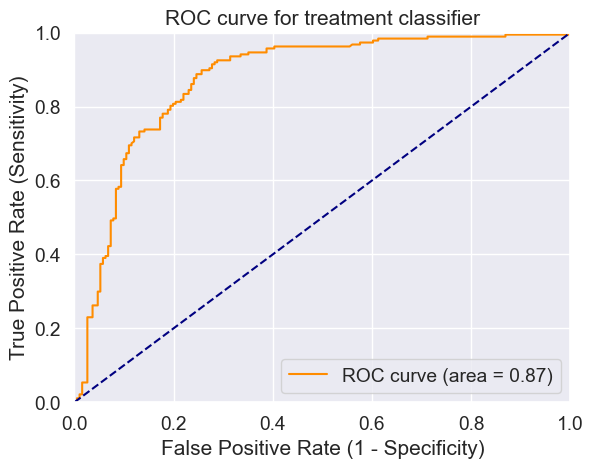

[[137  54]
 [ 15 172]]


{'Log. Regres.': 79.62962962962963,
 'KNN': 80.42328042328042,
 'Tree clas.': 80.68783068783068,
 'R. Forest': 81.21693121693121,
 'Bagging': 76.45502645502646,
 'Boosting': 81.74603174603175}

In [39]:
boosting(X_train, y_train, X_test, y_test, methodDict)

#### Stacking

In [40]:
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import binarize

def stacking(X_train, y_train, X_test, y_test, methodDict):
    # Building and fitting the stacking classifier
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()

    stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = stack.predict(X_test)
    
    print('########### Stacking ###############')
    
    # Evaluate the model
    accuracy_score = evalClassModel(stack, X_test, y_test, y_pred_class, True)

    # Store results for final graph
    methodDict['Stacking'] = accuracy_score * 100
    return methodDict


########### Stacking ###############
Accuracy: 0.8201058201058201
Null accuracy:
 0    191
1    187
Name: treatment, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0]


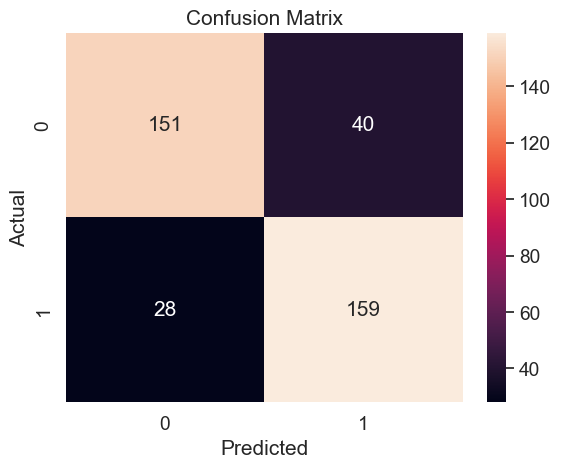

Classification Accuracy: 0.8201058201058201
Classification Error: 0.17989417989417988
False Positive Rate: 0.2094240837696335
Precision: 0.7989949748743719
AUC Score: 0.8204216479547554
Cross-validated AUC: 0.8437488457987072
First 10 predicted responses:
 [1 0 0 0 0 1 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.01710346 0.98289654]
 [0.98675465 0.01324535]
 [0.98675465 0.01324535]
 [0.98675465 0.01324535]
 [0.98675465 0.01324535]
 [0.01710346 0.98289654]
 [0.98675465 0.01324535]
 [0.97307936 0.02692064]
 [0.03462234 0.96537766]
 [0.01710346 0.98289654]]
First 10 predicted probabilities for class 1:
 [0.98289654 0.01324535 0.01324535 0.01324535 0.01324535 0.98289654
 0.01324535 0.02692064 0.96537766 0.98289654]


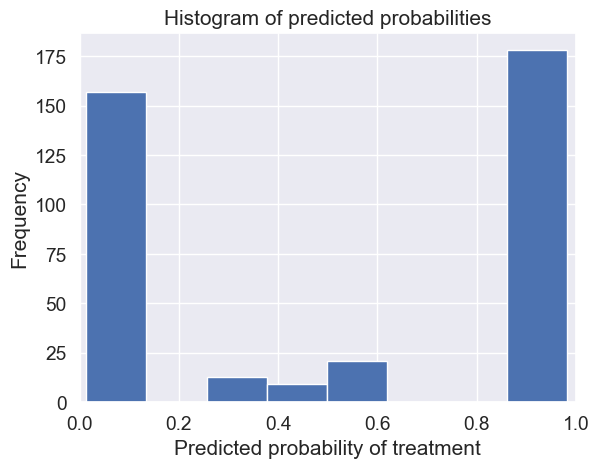

First 10 predicted probabilities:
 [[0.98289654]
 [0.01324535]
 [0.01324535]
 [0.01324535]
 [0.01324535]
 [0.98289654]
 [0.01324535]
 [0.02692064]
 [0.96537766]
 [0.98289654]]


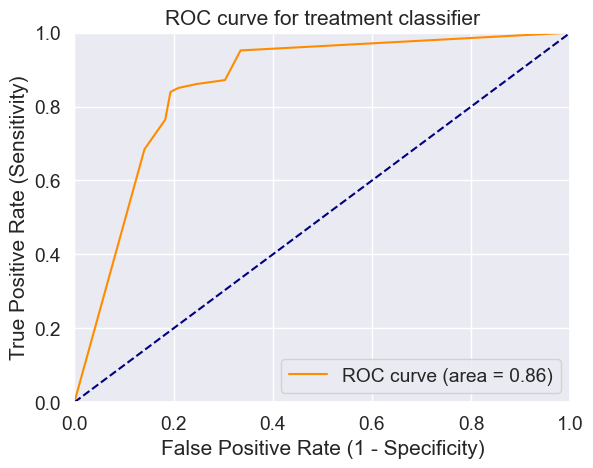

[[151  40]
 [ 28 159]]


{'Log. Regres.': 79.62962962962963,
 'KNN': 80.42328042328042,
 'Tree clas.': 80.68783068783068,
 'R. Forest': 81.21693121693121,
 'Bagging': 76.45502645502646,
 'Boosting': 81.74603174603175,
 'Stacking': 82.01058201058201}

In [41]:
stacking(X_train, y_train, X_test, y_test, methodDict)

### model plot

In [42]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

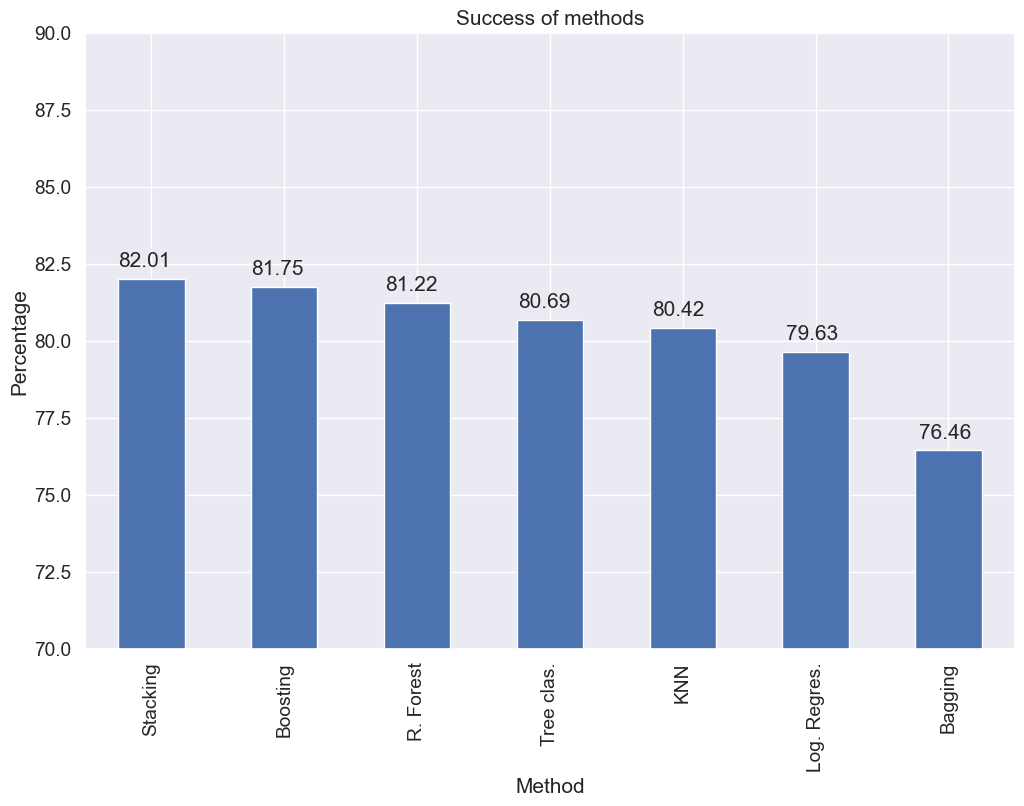

In [43]:
plotSuccess()

In [44]:
import pickle
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Define the stacking model
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()

stack_model = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)

# Train the stacking model
stack_model.fit(X_train, y_train)

# Save the trained model as a pickle file
pickle_filename = "model.pkl"
with open(pickle_filename, 'wb') as file:
    pickle.dump(stack_model, file)

# Return the path of the saved model
pickle_filename


'model.pkl'